In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix,roc_curve, roc_auc_score,auc
import sklearn.metrics as metrics

In [20]:
data = pd.read_csv("model.csv")

In [21]:
print("Data Head\n",data.head())

Data Head
                                               Review    Label
0  may sound noisi initi find good place bar nois...  Postive
1  good burger atmospher uniqu expect hard rock m...  Postive
2  pre arrang breakfast peopl open us normal open...  Postive
3  nice decor share platter crumb chicken spring ...  Postive
4  great hard rock never bad countri favourit far...  Postive


In [22]:
print("Data Describe\n", data.describe())

Data Describe
                                                    Review    Label
count                                                3062     3062
unique                                               1543        3
top     visit son whilst break birthday price reason c...  Postive
freq                                                    3     2742


In [23]:
print("Data Shape\n",data.shape)

Data Shape
 (3062, 2)


In [24]:
print("Data Label Count\n\n", data["Label"].value_counts())

Data Label Count

 Postive     2742
Negative     173
Neutral      147
Name: Label, dtype: int64


# Data is imbalance

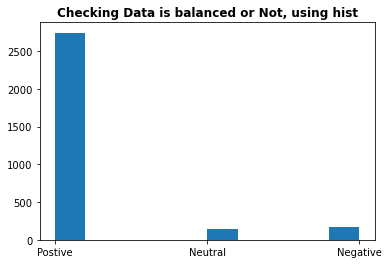

In [25]:
plt.hist(data.Label)
plt.title("Checking Data is balanced or Not, using hist",fontweight ="bold")
plt.show()

# CountVectorizer

#### The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. You can use it as follows: Create an instance of the CountVectorizer class

In [31]:
count_vect = CountVectorizer(max_features = 3000)
x = count_vect.fit_transform(data['Review'])

In [32]:
print("count_vector shape\n\n",x.shape)

count_vector shape

 (3062, 2424)


# # SMOTE - Synthetic Minority Oversampling Technique

##### way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

In [33]:
over_sample = SMOTE(random_state = 42, sampling_strategy = "all")

In [34]:
X_train_oversample, y_train_oversample = over_sample.fit_sample(x,data['Label'])

In [35]:
print("y_Train over sample \n\n", y_train_oversample.value_counts())

y_Train over sample 

 Postive     2742
Neutral     2742
Negative    2742
Name: Label, dtype: int64


In [36]:
print("x_train over sample", X_train_oversample.shape)

x_train over sample (8226, 2424)


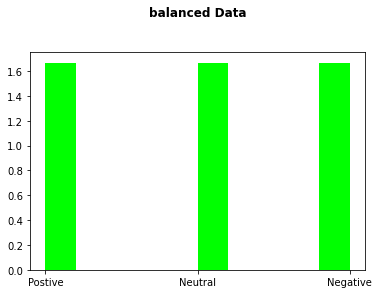

In [37]:
colors = ['lime'] 
  
plt.hist(y_train_oversample, 
         density = True,  
         histtype ='barstacked', 
         color = colors)  
  
plt.title('balanced Data\n\n', 
          fontweight ="bold") 
  
plt.show()

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_train_oversample, y_train_oversample, test_size = 0.3, random_state = 42)

In [39]:
print("X_train shape=",x_train.shape,'\n',"y_train shape=",y_train.shape)
print("x_test shape=",x_test.shape,'\n',"Y_test shape=" ,y_test.shape)

X_train shape= (5758, 2424) 
 y_train shape= (5758,)
x_test shape= (2468, 2424) 
 Y_test shape= (2468,)



# Random_Forest_Classifiers

In [40]:
RF = RandomForestClassifier(n_estimators = 120,
                           random_state = 50,
                           n_jobs = -1,
                           max_features = 'auto')
RF.fit(X_train_oversample,y_train_oversample)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=50)

In [41]:
rf_pred = RF.predict(x_test)

In [42]:
print("Recall=",recall_score(y_test, rf_pred, average='micro'),'\n')
print("Accuracy of Random forest classifier=", accuracy_score(y_test,rf_pred),'\n')
print("Classification Report:\n", classification_report(y_test,rf_pred),'\n')
print("Confusion Matrix \n", confusion_matrix(y_test,rf_pred),'\n')

Recall= 0.9902755267423015 

Accuracy of Random forest classifier= 0.9902755267423015 

Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      0.98      0.98       804
     Neutral       0.98      0.99      0.99       821
     Postive       1.00      1.00      1.00       843

    accuracy                           0.99      2468
   macro avg       0.99      0.99      0.99      2468
weighted avg       0.99      0.99      0.99      2468
 

Confusion Matrix 
 [[788  16   0]
 [  8 813   0]
 [  0   0 843]] 



# Everything goes good in Random_Forest_classifiers therefore we used RF for deployment part

# challenge We faced in project
 1) Extracting the reviews from Trip Advisore.
 2) everything went goodin EDA part.
 3) when we enters to a Model_building part , data is imablanced we used to undersample and oversample method and we balanced the data.
 we good a 